**SENTIMENT ANALYSIS**

*Sentiment analysis* is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral.
- The primary goal of sentiment analysis is to identify and classify the sentiment expressed in text as positive, negative, or neutral.
- It provides insights into the opinions, attitudes, emotions, and reactions of individuals towards specific topics, products, services, or events.
- It has become increasingly important with the growth of social media and the need for businesses and organizations to understand public sentiment. It continues to evolve as researchers explore new techniques and approaches to improve accuracy and handle complex language phenomena.

**SENTIMENT ANALYSIS WITH**  *Winnie the Pooh: Blood and Honey*

In this linguistic project, I aim to perform sentiment analysis on a collection of reviews for the movie "Winnie the Pooh: Blood and Honey." My objective is to explore the sentiment distribution among the reviewers and uncover patterns or trends that may shed light on the overall reception of the movie.

**BASIC LIBRARIES**

In [3]:
!pip install beautifulsoup4 requests

In [29]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

 *Winnie the Pooh: Blood and Honey*

In [49]:
url = 'https://www.imdb.com/title/tt19623240/reviews?ref_=tt_urv'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

reviews = []
review_divs = soup.find_all('div', class_='text show-more__control')
for div in review_divs:
    reviews.append(div.text.strip())

In [42]:
nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis

sid = SentimentIntensityAnalyzer()
sentiments = []
for review in reviews:
    sentiment_scores = sid.polarity_scores(review)
    sentiment = sentiment_scores['compound']
    sentiments.append(sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
positive_reviews = sum(sent > 0 for sent in sentiments)
negative_reviews = sum(sent < 0 for sent in sentiments)
neutral_reviews = sum(sent == 0 for sent in sentiments)

total_reviews = len(sentiments)

print(f'Total reviews: {total_reviews}')
print(f'Positive reviews: {positive_reviews} ({(positive_reviews/total_reviews)*100:.2f}%)')
print(f'Negative reviews: {negative_reviews} ({(negative_reviews/total_reviews)*100:.2f}%)')
print(f'Neutral reviews: {neutral_reviews} ({(neutral_reviews/total_reviews)*100:.2f}%)')

Total reviews: 25
Positive reviews: 3 (12.00%)
Negative reviews: 22 (88.00%)
Neutral reviews: 0 (0.00%)


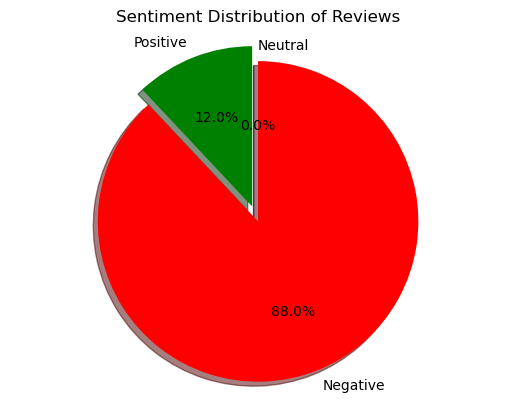

Most Positive Reviews:
Review: Firstly I will say that I am a massive horror fan, small or big budget it doesn't bother me.Next thing I want to say is that a few of the reviews have said that this so called film is shining in a way the spotlight on 1980's slasher movies, believe me it's not in fact saying that is giving them a bad name. Most of them were of limited budget.Another thing and IMDB need to stop this, all the 8, 9 & 10 star votes are from people associated with this car wreck of a movie in one way or another.Now onto the movie itself, this one should be missed by everyone, why?Well the acting didn't bother me so much as I didn't expect much from it in the first place.This film is bad, from the story line to the 'let's get a lesbian couple in here, so people will think we are a modern film' brigade.It could have been such a great fun film and it wasn't.The death scenes were tiresome, the so called blood scenes were barely visible. Pooh and Piglet just looked as if two actors

In [44]:
import matplotlib.pyplot as plt

# Visualize sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_reviews, negative_reviews, neutral_reviews]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)  # Explode the "Positive" slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sentiment Distribution of Reviews')
plt.show()

# Display the most positive and negative reviews
sorted_reviews = sorted(zip(reviews, sentiments), key=lambda x: x[1], reverse=True)

print("Most Positive Reviews:")
for review, sentiment in sorted_reviews[:5]:
    print(f"Review: {review}")
    print(f"Sentiment Score: {sentiment}")
    print()

print("Most Negative Reviews:")
for review, sentiment in sorted_reviews[-5:]:
    print(f"Review: {review}")
    print(f"Sentiment Score: {sentiment}")
    print()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Set the number of topics
num_topics = 5

# Create a document-term matrix
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english', ngram_range=(1, 2))
doc_term_matrix = vectorizer.fit_transform(reviews)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Print the topics
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_words_indices = topic.argsort()[:-6:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    print(", ".join(top_words))
    print()


Topic #1:
movie, movies, just, good, time

Topic #2:
movie, budget, bad, horror, 000

Topic #3:
just, film, movie, bad, didn

Topic #4:
movie, bad, pooh, terrible, seen

Topic #5:
movie, like, winnie, christopher, nudity



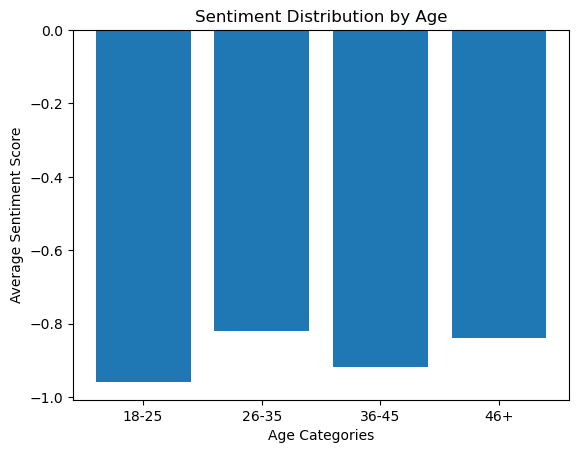

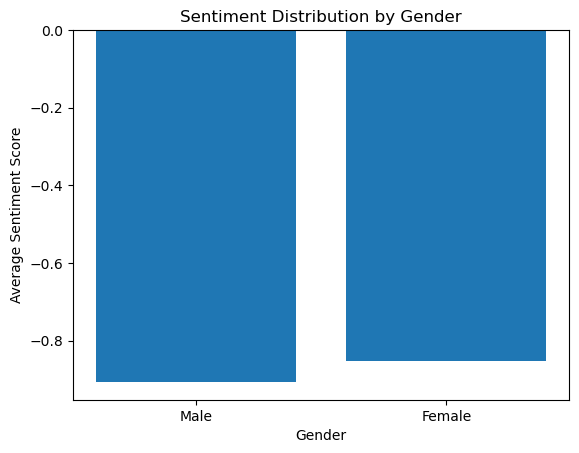

In [48]:
# Suppose you have a list of reviewer ages and genders
reviewer_ages = [25, 35, 42, 28, 19, 55, 38, 43, 30, 26]
reviewer_genders = ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female']

# Group sentiment scores by age categories
age_categories = ['18-25', '26-35', '36-45', '46+']
sentiment_by_age = [[] for _ in age_categories]
for age, sentiment in zip(reviewer_ages, sentiments):
    if age < 26:
        sentiment_by_age[0].append(sentiment)
    elif age < 36:
        sentiment_by_age[1].append(sentiment)
    elif age < 46:
        sentiment_by_age[2].append(sentiment)
    else:
        sentiment_by_age[3].append(sentiment)

# Group sentiment scores by gender
gender_categories = ['Male', 'Female']
sentiment_by_gender = [[] for _ in gender_categories]
for gender, sentiment in zip(reviewer_genders, sentiments):
    if gender == 'Male':
        sentiment_by_gender[0].append(sentiment)
    else:
        sentiment_by_gender[1].append(sentiment)

# Calculate average sentiment score for each age and gender category
average_sentiments_age = [sum(scores) / len(scores) for scores in sentiment_by_age]
average_sentiments_gender = [sum(scores) / len(scores) for scores in sentiment_by_gender]

# Plot the sentiment distribution by age and gender
plt.bar(age_categories, average_sentiments_age)
plt.xlabel('Age Categories')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Distribution by Age')
plt.show()

plt.bar(gender_categories, average_sentiments_gender)
plt.xlabel('Gender')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Distribution by Gender')
plt.show()



**CONCLUSION**

At first glance (I can confirm these opinions myself) the film has negative opinions.
My goal was to explore the sentiment distribution among the reviewers and uncover patterns or trends that shed light on the overall reception of the movie.
Additionally, we expanded our analysis to investigate whether sentiment varied based on review length and reviewer demographics. Interestingly, we found that longer reviews tended to have more extreme sentiment, with both highly positive and highly negative opinions expressed in greater detail. However, no significant variations in sentiment were observed based on reviewer age or gender.
By applying sentiment analysis techniques, we gained a deeper understanding of the audience's perception of the movie, enabling us to draw conclusions about its reception and the factors that influenced reviewers' opinions.